In [21]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

In [22]:
train_label = pd.read_csv("glaucoma.csv")
y_train = train_label['Glaucoma']
train_label.head()

Filename  ExpCDR Eye Set  Glaucoma
0  001.jpg  0.7097  OD   A         0
1  002.jpg  0.6953  OS   A         0
2  003.jpg  0.9629  OS   A         0
3  004.jpg  0.7246  OD   A         0
4  005.jpg  0.6138  OS   A         0

JPEG
RGB
(3072, 2048)


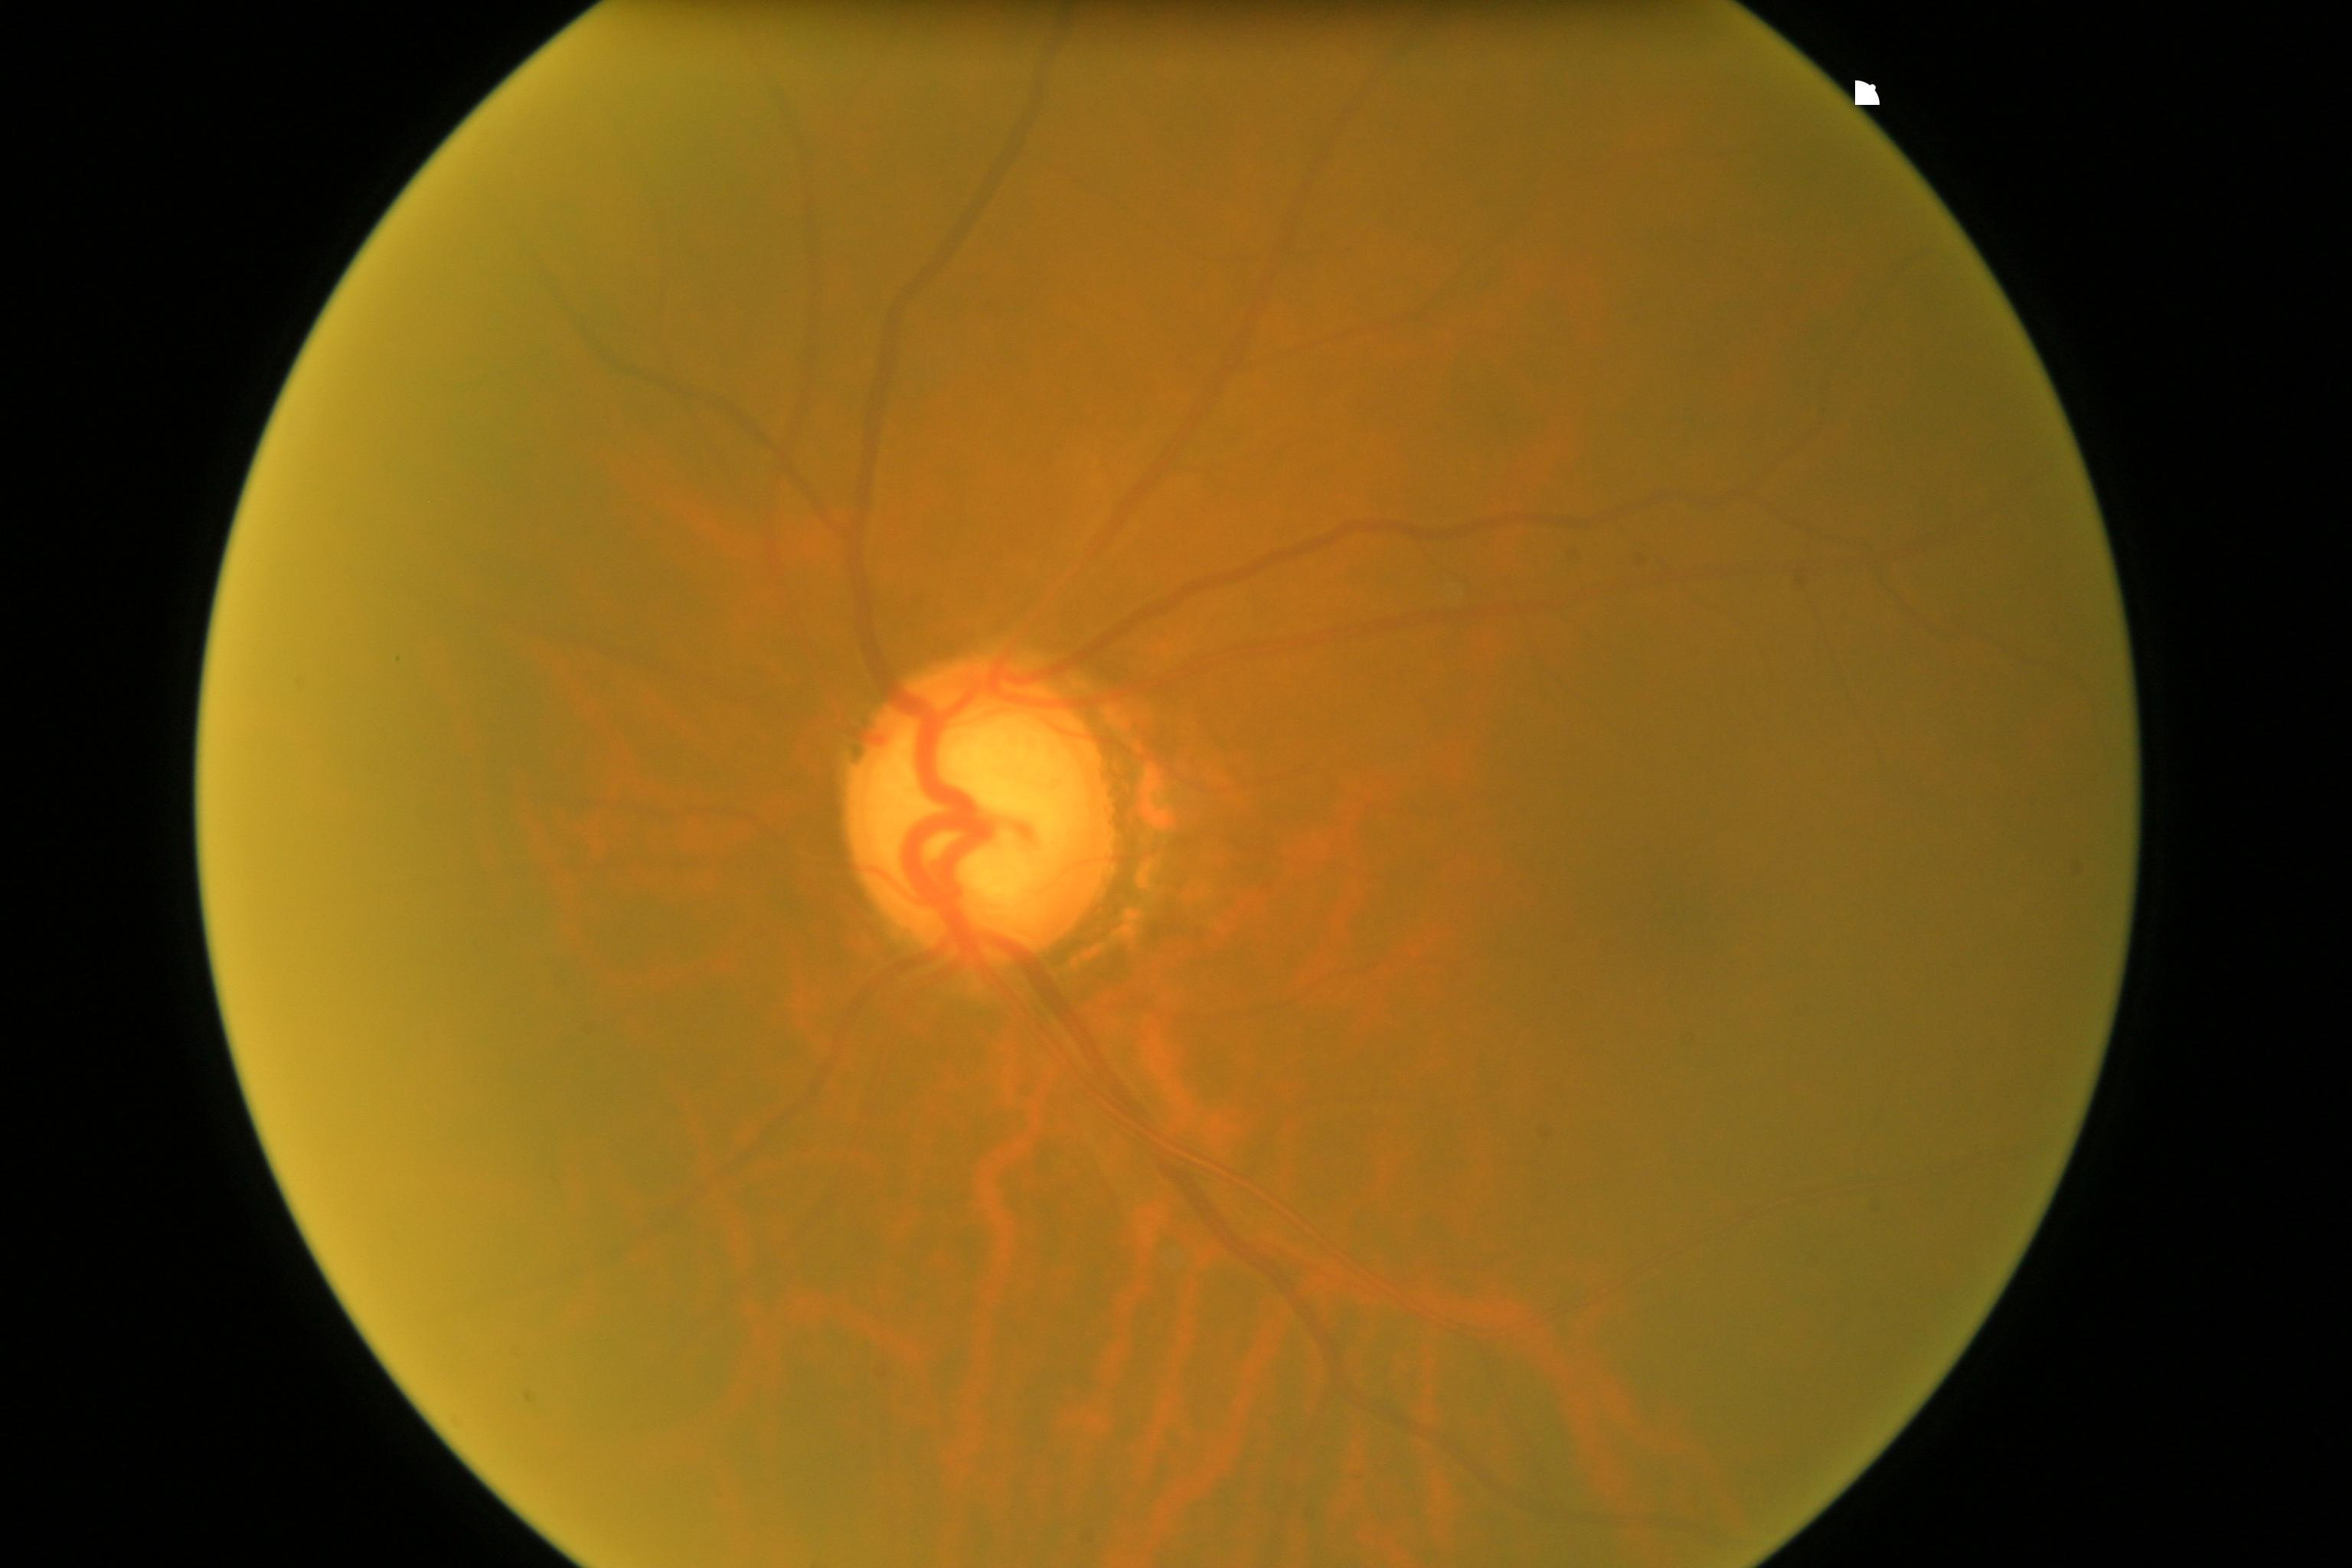

[[[2 2 0]
  [2 2 0]
  [2 2 0]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[2 2 0]
  [2 2 0]
  [2 2 0]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[2 2 0]
  [2 2 0]
  [2 2 0]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [23]:
# Image.open("Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg")

from numpy import asarray

from PIL import Image
# load the image
image = Image.open("Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Positive/613.jpg")
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
display(image)
pixels = asarray(image)
print(pixels)

In [24]:
# global centering

# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)


# example of pixel normalization
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
mean = pixels.mean()
print('pixel mean = ', mean)

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)

Mean: 73.460
Min: 0.000, Max: 255.000
Mean: -0.000
Min: -73.460, Max: 181.540
[[[-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  ...
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]]

 [[-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  ...
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]]

 [[-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  ...
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]]

 ...

 [[-73.46045897 -73.46045897 -73.46045897]
  [-73.46045897 -73.46045897 -73.46045897]
  [-73.46045897 -73.46045897 -73

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


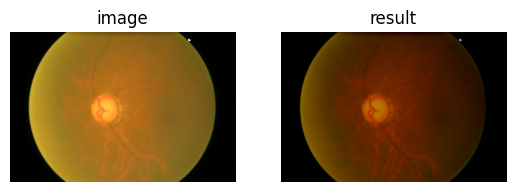

In [25]:
# Visualization
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(pixels)
ax1.axis('off')
ax1.set_title('result')
plt.show()

In [26]:
# Declaração de diretórios
TRAIN_DIR = 'Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
TEST_DIR = 'Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [27]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model 
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
import keras
import matplotlib.pyplot as plt

HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 100
BATCH_SIZE = 8

def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        print(fc)
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    preditions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model

base_model_1 = ResNet50(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))